# Решение практических заданий. Обучение случайного леса

Загрузим датасет с данными о грибах, с котормы в дальнейшем будем работать

In [1]:
import pandas as pd

mash_data = pd.read_csv('./data/training_mush.csv')
mash_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


### Задание
Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе.  
Передайте в GridSearchCV модель с указанием random_state:  
RandomForestClassifier(random_state=0)  
Параметры для выбора:
* n_estimators: от 10 до 50 с шагом 10
* max_depth: от 1 до 12 с шагом 2
* min_samples_leaf: от 1 до 7
* min_samples_split: от 2 до 9 с шагом 2  

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.  

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [2]:
y_train = mash_data['class']
X_train = mash_data.drop('class', axis=1)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0), 
    param_grid={'n_estimators': range(10, 51, 10),
                'max_depth': range(1, 13, 2),
                'min_samples_leaf': range(1, 8),
                'min_samples_split': range(2, 10, 2)},
    cv=3,
    n_jobs=-1)

gs.fit(X_train, y_train)

print('best_params:', gs.best_params_)

best_params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [4]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': gs.best_estimator_.feature_importances_})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его!  
Предскажите съедобность этих данных грибов и напишите в ответ число несъедобных грибов (класс равен 1).

In [5]:
X_test = pd.read_csv('./data/testing_mush.csv')

In [6]:
y_predicted = gs.best_estimator_.predict(X_test)
print(sum(y_predicted))

976


Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и правильным ответам.

In [7]:
from sklearn.metrics import confusion_matrix

y_true = pd.read_csv('./data/testing_y_mush.csv')
print(confusion_matrix(y_true, y_predicted))

[[1055    0]
 [   0  976]]


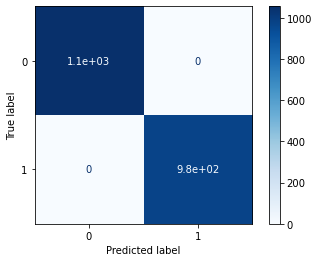

In [8]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(gs.best_estimator_, X_test, y_true, cmap=plt.cm.Blues, values_format='.2g')

### Задание
Перейдём к следующему датасэту.
На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры.  
Для борьбы с каждым типом кораблей используется свой вид оружия.  
Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке,  
чтобы успешно отбить нападения на различные области планеты.  

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.  
Обучите модель и предскажите классы кораблей для новых поступающих данных.  
Укажите в ответе через пробел число крейсеров, транспортников и истребителей.  

In [9]:
invasion_data = pd.read_csv('./data/invasion.csv')
invasion_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [10]:
y_train = invasion_data['class']
X_train = invasion_data.drop('class', axis=1)

In [11]:
gs = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0), 
    param_grid={'n_estimators': range(3, 10),
                'max_depth': range(1, 6, ),
                'min_samples_leaf': range(1, 5),
                'min_samples_split': range(2, 5)},
    cv=3,
    n_jobs=-1)

gs.fit(X_train, y_train)

print('best_params:', gs.best_params_)

best_params: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}


In [12]:
X_test = pd.read_csv('./data/operative_information.csv')

pd.Series(gs.best_estimator_.predict(X_test)).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

Какая переменная оказалась самой важной для классифицирования кораблей?

In [13]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': gs.best_estimator_.feature_importances_})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.566053
5,volume,0.158136
0,g_reflection,0.125776
1,i_reflection,0.091781
2,speed,0.058254
4,time_of_observance,0.000000


Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена!  
Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.  

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [14]:
df = pd.read_csv('./data/space_can_be_a_dangerous_place.csv')
df.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
